In [1]:
! pip install scikit-learn
! pip install scikit-plot

In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt
from wordcloud import WordCloud
# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# for kmean, dbscan
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

# for PCA
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# interactive plots
from plotly.subplots import make_subplots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

# Other dimension reductions
from sklearn.manifold import TSNE
from umap import UMAP

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [5]:
credit=pd.DataFrame(pd.read_csv('BankChurners.csv'))
credit.head()

CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0  768805383  ...                                            0.99991                                                                                
1  818770008  ...                                            0.99994                                                                                
2  713982108  ...                                            0.99998                                                                                
3  769911858  ...                                            0.99987                                                                                
4  709106358  ...                                            0.99998                                                                                

[5 rows x 23 columns]

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
credit = credit.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [ ]:
credit.head()

CLIENTNUM     Attrition_Flag  ...  Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio
0  768805383  Existing Customer  ...                1.625                 0.061
1  818770008  Existing Customer  ...                3.714                 0.105
2  713982108  Existing Customer  ...                2.333                 0.000
3  769911858  Existing Customer  ...                2.333                 0.760
4  709106358  Existing Customer  ...                2.500                 0.000

[5 rows x 21 columns]

In [ ]:
credit.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
credit.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## EDA

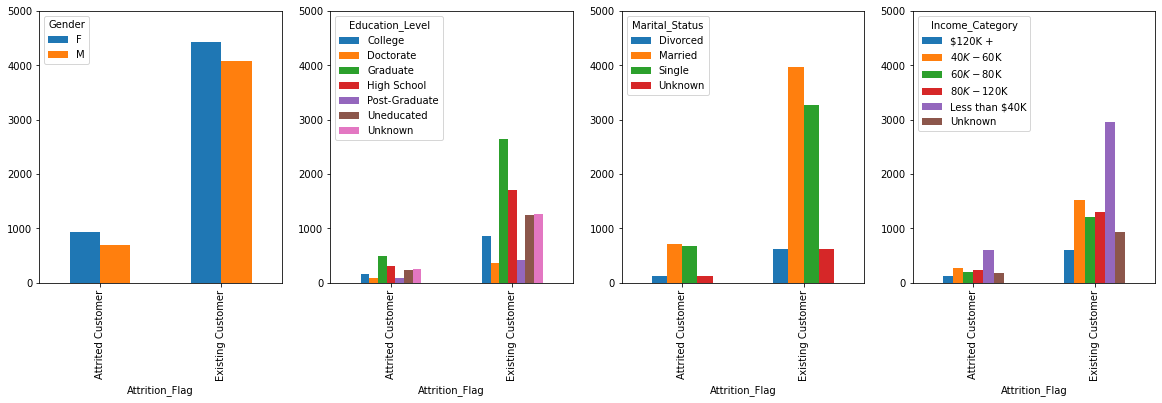

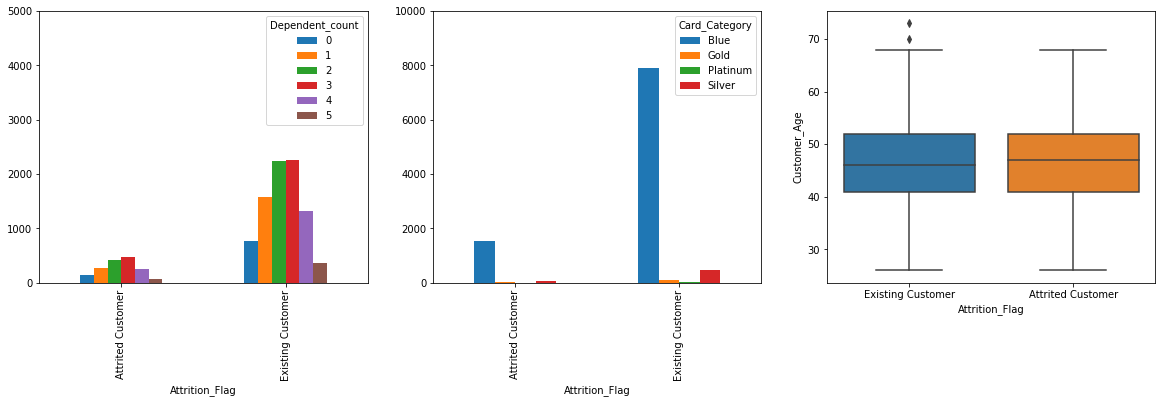

In [ ]:
df_demographic=pd.concat([credit['Customer_Age'],credit['Gender'],credit['Education_Level'],credit['Marital_Status'],credit['Income_Category'],credit['Attrition_Flag']],axis=1)
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(credit['Attrition_Flag'],credit['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(credit['Attrition_Flag'],credit['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(credit['Attrition_Flag'],credit['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(credit['Attrition_Flag'],credit['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(credit['Attrition_Flag'],credit['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(credit['Attrition_Flag'],credit['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

In [ ]:
fig = px.box(credit, x='Gender',y='Avg_Utilization_Ratio', color='Attrition_Flag', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

In [ ]:
fig = px.box(credit, x='Card_Category',y='Customer_Age', color='Attrition_Flag', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

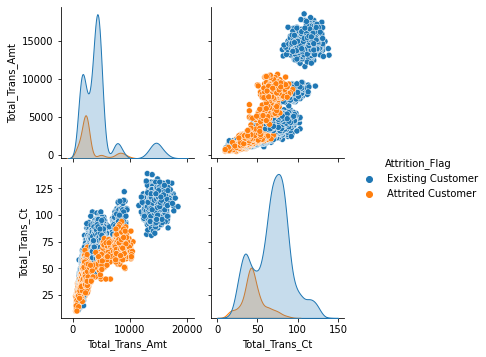

In [ ]:
sns.pairplot(credit, vars=['Total_Trans_Amt','Total_Trans_Ct'], hue='Attrition_Flag', height=2.5)

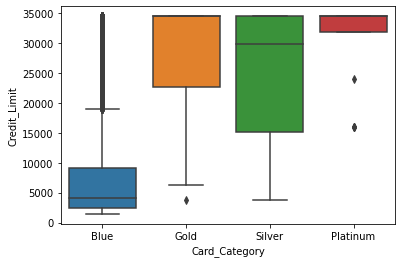

In [ ]:
sns.boxplot(x='Card_Category', y='Credit_Limit', data=credit)

In [ ]:
credit['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
credit.groupby('Card_Category').agg({'Credit_Limit':['mean','median','min','max']})

Credit_Limit                           
                       mean   median      min      max
Card_Category                                         
Blue            7363.780002   4105.0   1438.3  34516.0
Gold           28416.370690  34516.0   3735.0  34516.0
Platinum       30283.450000  34516.0  15987.0  34516.0
Silver         25277.836036  29808.0   3735.0  34516.0

In [ ]:
credit.groupby('Card_Category')[['Months_on_book']].mean()

Months_on_book
Card_Category                
Blue                35.960682
Gold                35.525862
Platinum            36.250000
Silver              35.452252

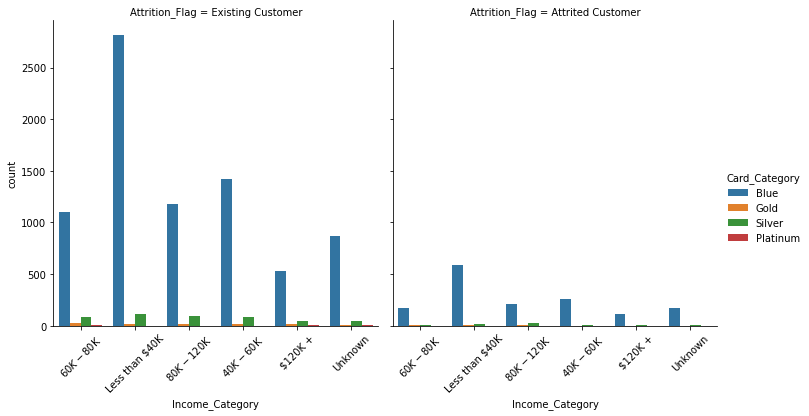

In [ ]:
sns.catplot(kind='count', x='Income_Category', hue='Card_Category', col='Attrition_Flag', data=credit).set_xticklabels(rotation=45)

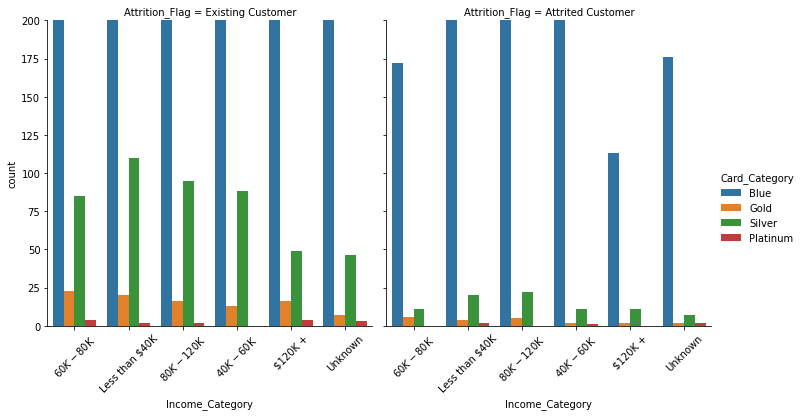

In [ ]:
# Zoomed in version
sns.catplot(kind='count', x='Income_Category', hue='Card_Category', col='Attrition_Flag', data=credit).set_xticklabels(rotation=45)
plt.ylim(top=200)
plt.ylim(bottom=0) 
plt.show()

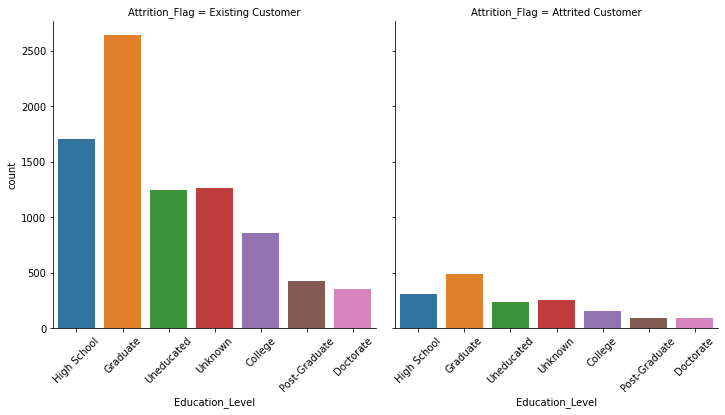

In [ ]:
sns.catplot(kind='count', x='Education_Level', col='Attrition_Flag', data=credit).set_xticklabels(rotation=45)

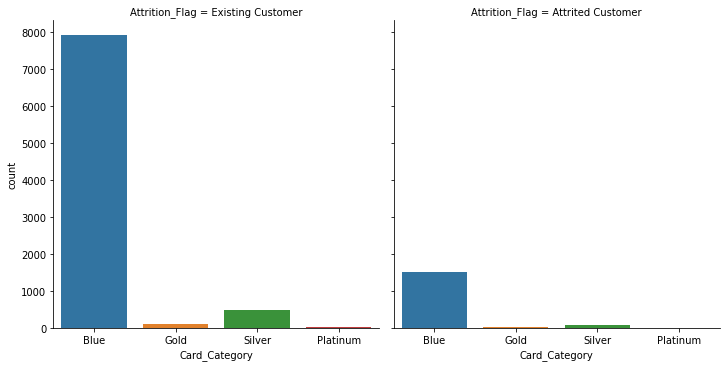

In [ ]:
sns.catplot(kind='count', x='Card_Category', col='Attrition_Flag', data=credit)

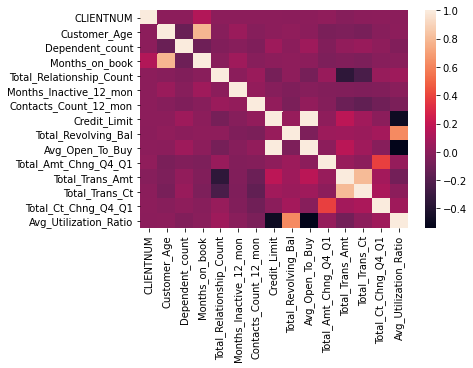

In [ ]:
cc = credit.corr()
sns.heatmap(cc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



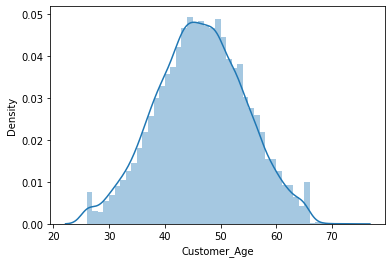

In [ ]:
sns.distplot(credit['Customer_Age'])

In [ ]:
credit.groupby('Card_Category')[['Customer_Age']].mean().sort_values('Customer_Age', ascending=False)

Customer_Age
Card_Category              
Platinum          47.500000
Blue              46.372404
Silver            45.679279
Gold              45.439655

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



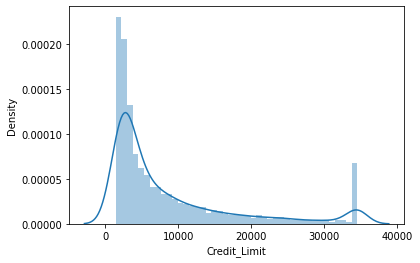

In [ ]:
sns.distplot(credit['Credit_Limit'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



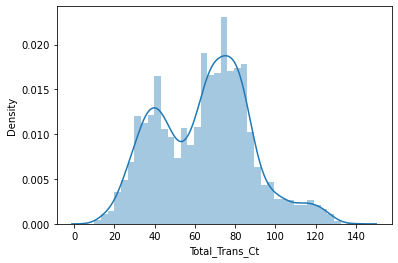

In [ ]:
sns.distplot(credit['Total_Trans_Ct'])

In [ ]:
credit.groupby('Card_Category')[['Total_Trans_Ct']].mean().sort_values('Total_Trans_Ct', ascending=False)

Total_Trans_Ct
Card_Category                
Platinum            86.950000
Gold                81.517241
Silver              74.700901
Blue                64.028190

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



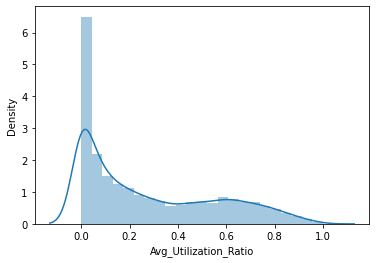

In [ ]:
sns.distplot(credit['Avg_Utilization_Ratio'])

In [ ]:
credit.groupby(['Dependent_count','Card_Category'])[['CLIENTNUM']].count()/credit.groupby('Dependent_count')[['CLIENTNUM']].count()

CLIENTNUM
Dependent_count Card_Category           
0               Blue            0.928097
                Gold            0.008850
                Platinum        0.002212
                Silver          0.060841
1               Blue            0.946137
                Gold            0.007617
                Platinum        0.000544
                Silver          0.045702
2               Blue            0.935217
                Gold            0.010546
                Platinum        0.002260
                Silver          0.051977
3               Blue            0.931918
                Gold            0.010981
                Platinum        0.002928
                Silver          0.054173
4               Blue            0.915502
                Gold            0.019060
                Platinum        0.001906
                Silver          0.063532
5               Blue            0.915094
                Gold            0.014151
                Silver          0.070755

In [ ]:
credit.groupby('Dependent_count')[['CLIENTNUM']].count()

CLIENTNUM
Dependent_count           
0                      904
1                     1838
2                     2655
3                     2732
4                     1574
5                      424

In [ ]:
yprop = 'Months_on_book'
xprop = 'Dependent_count'
h= 'Attrition_Flag'
px.scatter(credit, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



(-0.5, 511.5, 383.5, -0.5)

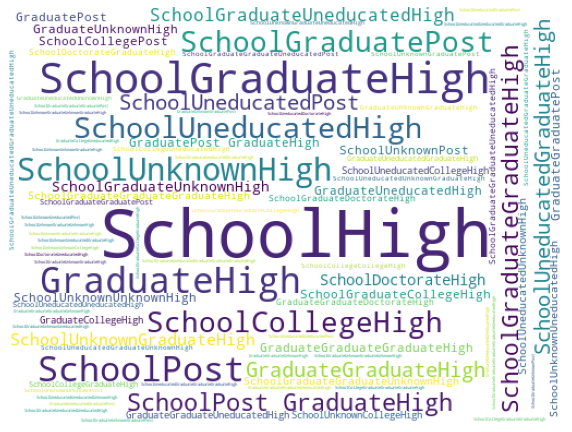

In [ ]:
plt.subplots(figsize=(10,22))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(credit.Education_Level))

plt.imshow(wordcloud)
plt.axis('off')

## Data Preparation

> **numerical variables**

In [6]:
# set client number as the index
credit.columns = credit.columns.str.lower()
credit.index = credit['clientnum']
credit = credit.drop('clientnum', axis=1)

In [7]:
# get all the numeric variables
numcol = credit.select_dtypes('number')

In [8]:
numcol.head()

customer_age  ...  naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
clientnum                ...                                                                                                                                    
768805383            45  ...                                            0.99991                                                                                 
818770008            49  ...                                            0.99994                                                                                 
713982108            51  ...                                            0.99998                                                                                 
769911858            40  ...                                            0.99987                                                                                 
709106358            40  ...                                            0.99998                                                                                 

[5 rows x 16 columns]

In [9]:
# standardize numeric variables
sc = StandardScaler()
scaled_c = sc.fit_transform(numcol)

In [10]:
num_c = pd.DataFrame(scaled_c, columns=numcol.columns, index=numcol.index)

In [11]:
num_c.head()

customer_age  ...  naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
clientnum                ...                                                                                                                                    
768805383     -0.165406  ...                                           0.437763                                                                                 
818770008      0.333570  ...                                           0.437845                                                                                 
713982108      0.583058  ...                                           0.437955                                                                                 
769911858     -0.789126  ...                                           0.437654                                                                                 
709106358     -0.789126  ...                                           0.437955                                                                                 

[5 rows x 16 columns]

> **categorical variables**

In [12]:
# get all the categorical variables
catcol = credit.select_dtypes('object')

In [13]:
catcol.head()

attrition_flag gender  ... income_category card_category
clientnum                            ...                              
768805383  Existing Customer      M  ...     $60K - $80K          Blue
818770008  Existing Customer      F  ...  Less than $40K          Blue
713982108  Existing Customer      M  ...    $80K - $120K          Blue
769911858  Existing Customer      F  ...  Less than $40K          Blue
709106358  Existing Customer      M  ...     $60K - $80K          Blue

[5 rows x 6 columns]

In [14]:
# create dummy variables
c = pd.get_dummies(catcol, drop_first=True)

In [15]:
c.head()

attrition_flag_Existing Customer  ...  card_category_Silver
clientnum                                    ...                      
768805383                                 1  ...                     0
818770008                                 1  ...                     0
713982108                                 1  ...                     0
769911858                                 1  ...                     0
709106358                                 1  ...                     0

[5 rows x 19 columns]

In [16]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   attrition_flag_Existing Customer  10127 non-null  uint8
 1   gender_M                          10127 non-null  uint8
 2   education_level_Doctorate         10127 non-null  uint8
 3   education_level_Graduate          10127 non-null  uint8
 4   education_level_High School       10127 non-null  uint8
 5   education_level_Post-Graduate     10127 non-null  uint8
 6   education_level_Uneducated        10127 non-null  uint8
 7   education_level_Unknown           10127 non-null  uint8
 8   marital_status_Married            10127 non-null  uint8
 9   marital_status_Single             10127 non-null  uint8
 10  marital_status_Unknown            10127 non-null  uint8
 11  income_category_$40K - $60K       10127 non-null  uint8
 12  income_category_$60K

In [17]:
# combine numerical and categorical columns together
scredit = pd.concat([num_c, c], axis=1)

In [18]:
scredit.head()

customer_age  ...  card_category_Silver
clientnum                ...                      
768805383     -0.165406  ...                     0
818770008      0.333570  ...                     0
713982108      0.583058  ...                     0
769911858     -0.789126  ...                     0
709106358     -0.789126  ...                     0

[5 rows x 35 columns]

In [19]:
# drop target variables (supervised)
sdata = scredit.drop(['attrition_flag_Existing Customer'], axis=1)
sdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 34 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   customer_age                                                                                                                        10127 non-null  float64
 1   dependent_count                                                                                                                     10127 non-null  float64
 2   months_on_book                                                                                                                      10127 non-null  float64
 3   total_relationship_count                                             

In [ ]:
# drop churn/no-churn, and card type (unsupervised)
udata = scredit.drop(['card_category_Gold','card_category_Platinum','card_category_Silver','attrition_flag_Existing Customer'], axis=1)
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_age                    10127 non-null  float64
 1   dependent_count                 10127 non-null  float64
 2   months_on_book                  10127 non-null  float64
 3   total_relationship_count        10127 non-null  float64
 4   months_inactive_12_mon          10127 non-null  float64
 5   contacts_count_12_mon           10127 non-null  float64
 6   credit_limit                    10127 non-null  float64
 7   total_revolving_bal             10127 non-null  float64
 8   avg_open_to_buy                 10127 non-null  float64
 9   total_amt_chng_q4_q1            10127 non-null  float64
 10  total_trans_amt                 10127 non-null  float64
 11  total_trans_ct                  10127 non-null  float64
 12  total_ct_chng_q4_q1 

In [ ]:
scredit.describe().T

count          mean  ...       75%        max
customer_age                      10127.0  3.127744e-17  ...  0.707802   3.327426
dependent_count                   10127.0  5.680062e-15  ...  0.503368   2.043199
months_on_book                    10127.0 -5.687166e-16  ...  0.509840   2.513340
total_relationship_count          10127.0  8.453372e-15  ...  0.763943   1.407306
months_inactive_12_mon            10127.0 -2.129892e-15  ...  0.651940   3.620555
contacts_count_12_mon             10127.0  1.588144e-15  ...  0.492404   3.204463
credit_limit                      10127.0  9.430893e-16  ...  0.267986   2.848054
total_revolving_bal               10127.0 -1.830898e-15  ...  0.762241   1.661686
avg_open_to_buy                   10127.0 -4.386159e-17  ...  0.262904   2.975375
total_amt_chng_q4_q1              10127.0 -2.522751e-16  ...  0.451921  12.030603
total_trans_amt                   10127.0 -5.134192e-16  ...  0.099181   4.144855
total_trans_ct                    10127.0  1.194179e-14  ...  0.687701   3.158792
total_ct_chng_q4_q1               10127.0 -1.100466e-16  ...  0.444305  12.608573
avg_utilization_ratio             10127.0 -2.186132e-16  ...  0.827438   2.626640
attrition_flag_Existing Customer  10127.0  8.393404e-01  ...  1.000000   1.000000
gender_M                          10127.0  4.709193e-01  ...  1.000000   1.000000
education_level_Doctorate         10127.0  4.453441e-02  ...  0.000000   1.000000
education_level_Graduate          10127.0  3.088773e-01  ...  1.000000   1.000000
education_level_High School       10127.0  1.987756e-01  ...  0.000000   1.000000
education_level_Post-Graduate     10127.0  5.095290e-02  ...  0.000000   1.000000
education_level_Uneducated        10127.0  1.468352e-01  ...  0.000000   1.000000
education_level_Unknown           10127.0  1.499951e-01  ...  0.000000   1.000000
marital_status_Married            10127.0  4.628222e-01  ...  1.000000   1.000000
marital_status_Single             10127.0  3.893552e-01  ...  1.000000   1.000000
marital_status_Unknown            10127.0  7.396070e-02  ...  0.000000   1.000000
income_category_$40K - $60K       10127.0  1.767552e-01  ...  0.000000   1.000000
income_category_$60K - $80K       10127.0  1.384418e-01  ...  0.000000   1.000000
income_category_$80K - $120K      10127.0  1.515750e-01  ...  0.000000   1.000000
income_category_Less than $40K    10127.0  3.516342e-01  ...  1.000000   1.000000
income_category_Unknown           10127.0  1.098055e-01  ...  0.000000   1.000000
card_category_Gold                10127.0  1.145453e-02  ...  0.000000   1.000000
card_category_Platinum            10127.0  1.974919e-03  ...  0.000000   1.000000
card_category_Silver              10127.0  5.480399e-02  ...  0.000000   1.000000

[33 rows x 8 columns]

# Machine Learning

## Customer churn/ no-churn

### USML

In [ ]:
sdata = scredit.drop(['attrition_flag_Existing Customer'], axis=1)

In [ ]:
pca = PCA()
pcs = pca.fit_transform(sdata)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



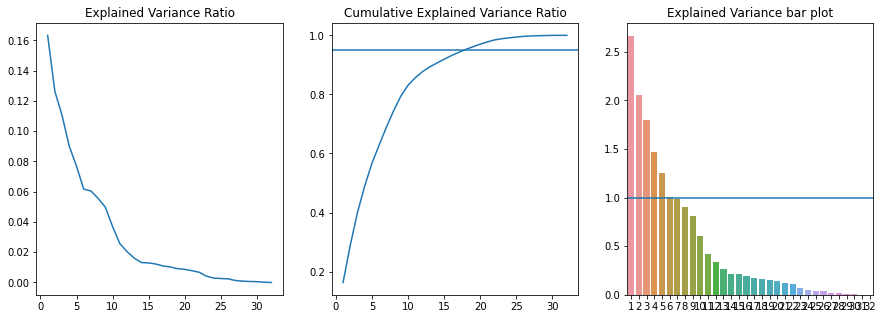

In [ ]:
# check how many pca variables to have
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Explained Variance Ratio')
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1,len(varexp)+1),varexp)

plt.subplot(1,3,2)
plt.title('Cumulative Explained Variance Ratio')
sns.lineplot(range(1,len(varexp)+1),np.cumsum(varexp))
plt.axhline(0.95)


plt.subplot(1,3,3)
plt.title('Explained Variance bar plot')
ev = pca.explained_variance_
sns.barplot(list(range(1,len(ev)+1)),
            list(ev))
plt.axhline(1)

plt.show()

In [ ]:
# get a pc dataframe and choose only the first 5
compns = pcs[:, :5]
cdf1 = pd.DataFrame(compns, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5'], index=scredit.index)

In [ ]:
cdf1.head(3)

pc1       pc2       pc3       pc4       pc5
clientnum                                                  
768805383  0.481371 -0.549519 -0.824826  3.858319  2.882785
818770008 -0.526033  1.350390 -0.100618  8.597396  7.123313
713982108 -0.397860  0.955749 -0.633497  7.512012  7.864568

In [ ]:
# use 2 to 30 clusters
KRANGE = range(2,10)

# storage
inertia = []
silo = []

for k in KRANGE:
  km = KMeans(k)
  km.fit(cdf1)
  labs = km.predict(cdf1)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(cdf1, labs))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



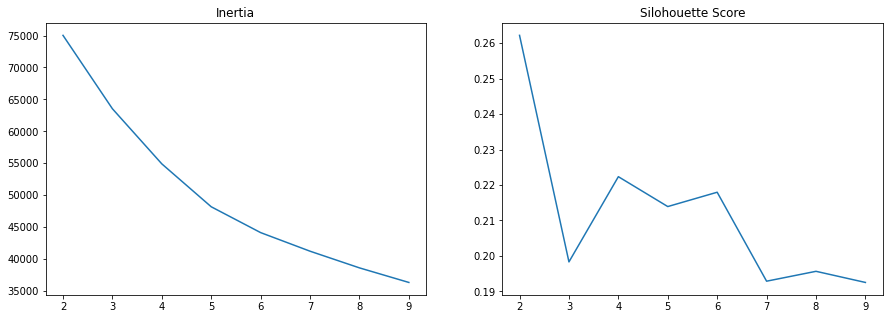

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KRANGE, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KRANGE, silo)

plt.show()

In [ ]:
# get the churn/no churn model
k2 = KMeans(2)
k2_labs = k2.fit_predict(cdf1)

# metrics
k2_silo = silhouette_score(cdf1, k2_labs)
k2_ssamps = silhouette_samples(cdf1, k2_labs)
np.unique(k2_labs)

array([0, 1], dtype=int32)

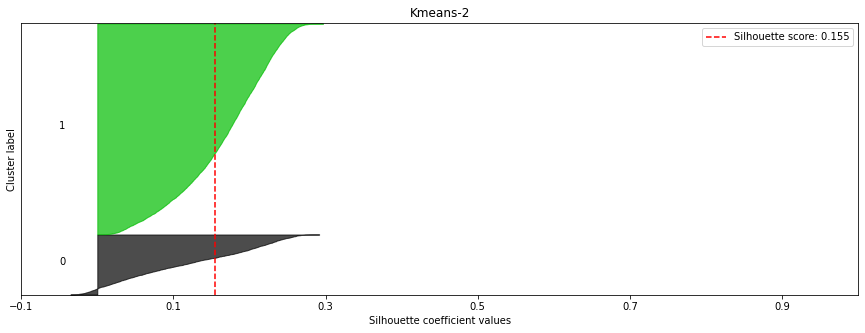

In [ ]:
skplt.metrics.plot_silhouette(scredit, k2_labs, title="Kmeans-2", figsize=(15,5))
plt.show()

In [ ]:
# profile to original
sdata['k2_labs'] = k2_labs
sdata['k2_labs'].value_counts(sort=False)

0    2247
1    7880
Name: k2_labs, dtype: int64

In [ ]:
profile = sdata.groupby('k2_labs').mean().T
profile

k2_labs                                0         1
customer_age                   -0.008351  0.002381
dependent_count                 0.139140 -0.039676
months_on_book                 -0.003853  0.001099
total_relationship_count       -0.233886  0.066693
months_inactive_12_mon         -0.042102  0.012005
contacts_count_12_mon           0.000765 -0.000218
credit_limit                    1.586141 -0.452292
total_revolving_bal            -0.033109  0.009441
avg_open_to_buy                 1.588776 -0.453043
total_amt_chng_q4_q1            0.040051 -0.011421
total_trans_amt                 0.527007 -0.150277
total_trans_ct                  0.327426 -0.093366
total_ct_chng_q4_q1             0.012600 -0.003593
avg_utilization_ratio          -0.795448  0.226824
gender_M                        0.832221  0.367893
education_level_Doctorate       0.041389  0.045431
education_level_Graduate        0.299065  0.311675
education_level_High School     0.194927  0.199873
education_level_Post-Graduate   0.056965  0.049239
education_level_Uneducated      0.158433  0.143528
education_level_Unknown         0.149978  0.150000
marital_status_Married          0.408990  0.478173
marital_status_Single           0.419226  0.380838
marital_status_Unknown          0.089008  0.069670
income_category_$40K - $60K     0.080552  0.204188
income_category_$60K - $80K     0.209613  0.118147
income_category_$80K - $120K    0.356030  0.093274
income_category_Less than $40K  0.045839  0.438832
income_category_Unknown         0.108144  0.110279
card_category_Gold              0.048509  0.000888
card_category_Platinum          0.008901  0.000000
card_category_Silver            0.210948  0.010279

Text(0.5, 1.0, 'Characteristics of 2 customer clusters')

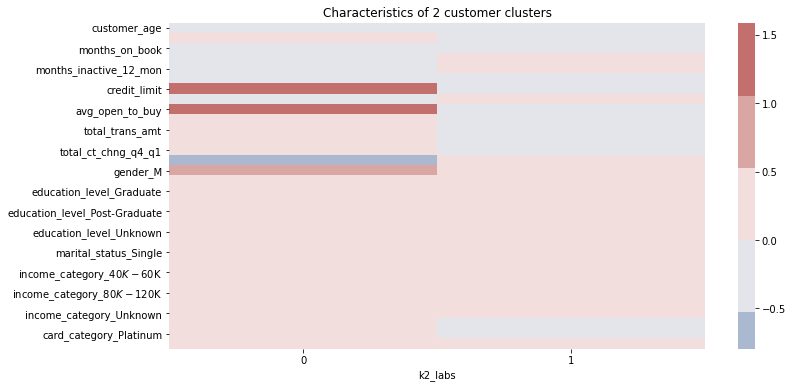

In [ ]:
plt.figure(figsize=(12, 6))
pal = sns.color_palette("vlag")
sns.heatmap(profile, center=0, cmap = pal,xticklabels=profile.columns)
plt.title('Characteristics of 2 customer clusters')

#### Other Methods: TSNE + KMEANS
* does not work well

In [ ]:

tsne = TSNE()
tsne.fit(cdf1)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
te = tsne.embedding_

In [ ]:
tdata = pd.DataFrame(te, columns=["e1", "e2"], index=credit.index)

In [ ]:
tdata.shape

(10127, 2)

In [ ]:
# get the model
k2 = KMeans(2)
k2_labs = k2.fit_predict(tdata)

# metrics
k2_silo = silhouette_score(tdata, k2_labs)
k2_ssamps = silhouette_samples(tdata, k2_labs)
np.unique(k2_labs)

array([0, 1], dtype=int32)

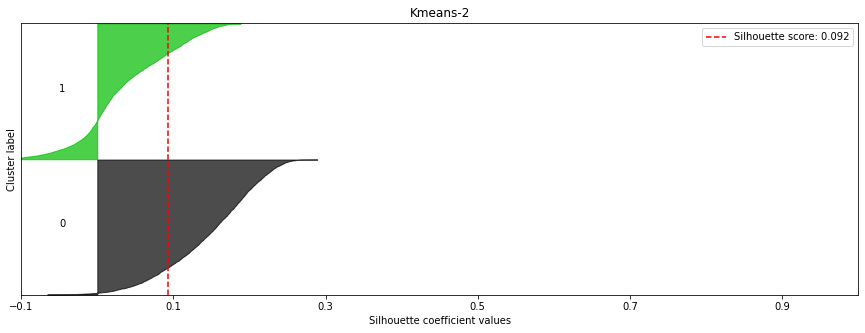

In [ ]:
skplt.metrics.plot_silhouette(scredit, k2_labs, title="Kmeans-2", figsize=(15,5))
plt.show()

In [ ]:
tdata['k2_labs'] = k2_labs

In [ ]:
tdata.head()

e1         e2  k2_labs
clientnum                               
768805383 -43.734653  62.853870        0
818770008 -46.791111  61.031063        0
713982108 -46.698059  61.082066        0
769911858 -44.222790  59.303265        0
709106358 -46.442600  61.324883        0

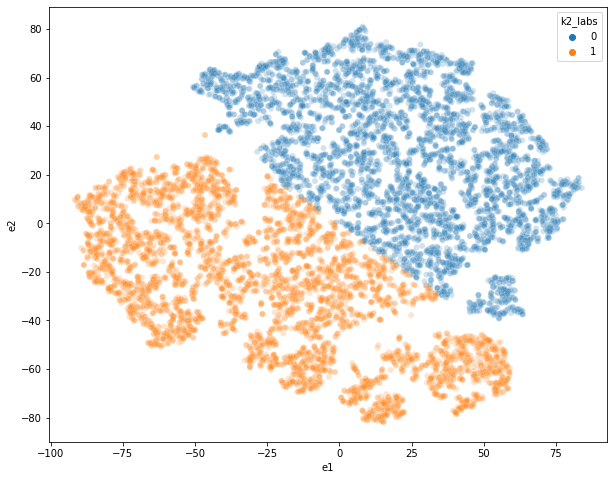

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", data=tdata, hue='k2_labs', alpha=0.2)

In [ ]:
tdata['attrition'] = credit['attrition_flag']

In [ ]:
tdata.head()

e1         e2  k2_labs          attrition
clientnum                                                  
768805383 -43.734653  62.853870        0  Existing Customer
818770008 -46.791111  61.031063        0  Existing Customer
713982108 -46.698059  61.082066        0  Existing Customer
769911858 -44.222790  59.303265        0  Existing Customer
709106358 -46.442600  61.324883        0  Existing Customer

#### Other Methods: DBSCAN

In [ ]:
cls = scredit.drop(['card_category_Gold','card_category_Platinum','card_category_Silver','attrition_flag_Existing Customer'],axis=1)

In [ ]:
X = cls

In [ ]:
clustering = DBSCAN(eps=3, min_samples=5).fit(X)

In [ ]:
labels = clustering.labels_

In [ ]:
(unique, counts) = np.unique(clustering.labels_, return_counts=True)
(unique, counts)

(array([-1,  0]), array([ 269, 9858]))

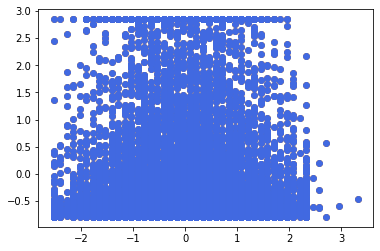

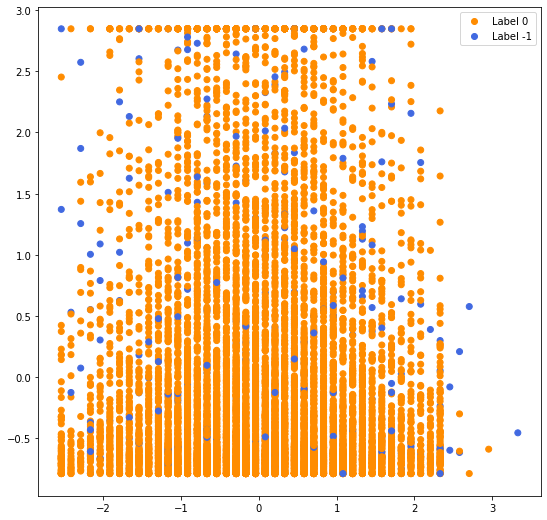

In [ ]:
colours = {} 
colours[0] = 'darkorange'
colours[-1] = 'royalblue'
c = [colours[label] for label in labels] 
darkorange = plt.scatter(X['customer_age'], X['credit_limit'], color ='darkorange')
royalblue = plt.scatter(X['customer_age'], X['credit_limit'], color ='royalblue')
plt.figure(figsize =(9, 9)) 
plt.scatter(X['customer_age'], X['credit_limit'], c = c) 
plt.legend((darkorange, royalblue), ('Label 0', 'Label -1'))   
plt.show() 

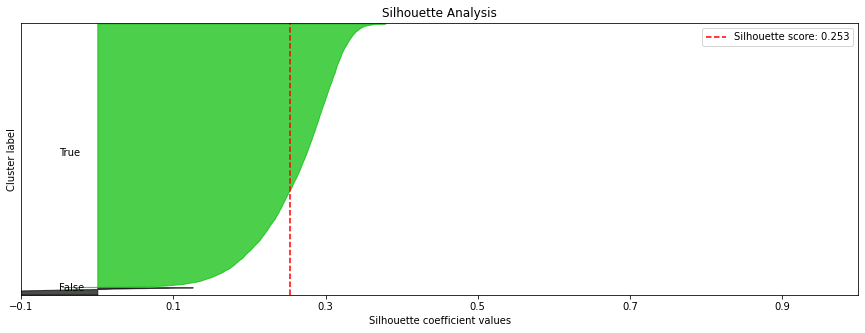

In [ ]:
skplt.metrics.plot_silhouette(cls, labels==0, figsize=(15,5))
plt.show()

In [ ]:
scredit['labels'] = labels==0
(scredit['labels'] == scredit['attrition_flag_Existing Customer']).mean()

0.8226523155919818

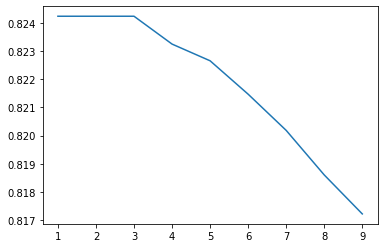

In [ ]:
score = []
for i in list(range(1,10)):
    clustering = DBSCAN(eps=3, min_samples=i).fit(X)
    labels = clustering.labels_
    scredit['labels'] = labels==0
    score.append((scredit['labels'] == scredit['attrition_flag_Existing Customer']).mean())
plt.plot(list(range(1,10)),score)

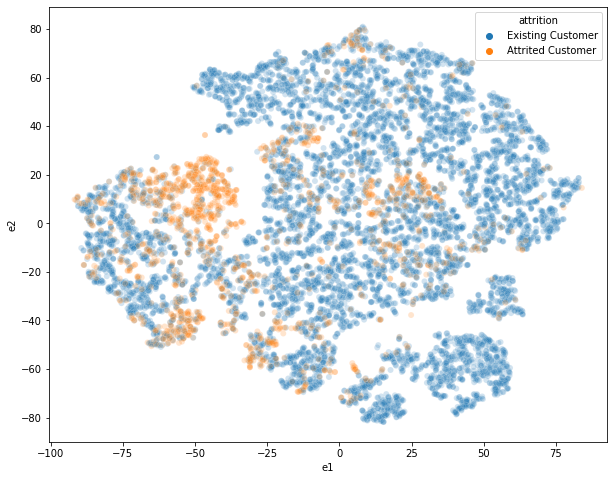

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="e1", y="e2", data=tdata, hue='attrition', alpha=0.2)

#### Try hcluster. 

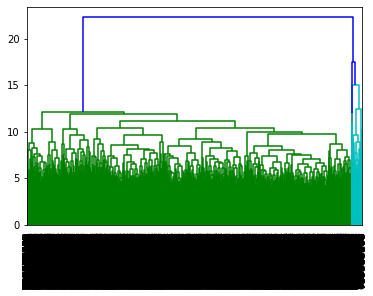

In [ ]:
dendrogram(linkage(scredit.values, method='complete'),
             labels = scredit.index,
             leaf_rotation=90,
             leaf_font_size=10)
  
plt.show()

### SML

In [20]:
# set target varibale
X = sdata
y = scredit['attrition_flag_Existing Customer']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=820, stratify=y)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

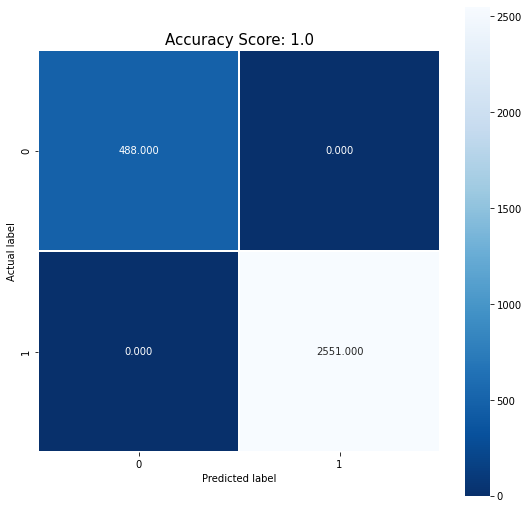

In [22]:
model = LogisticRegression()

#Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(acc_logreg)
plt.title(all_sample_title, size = 15)

Feature: 0, Score: -0.00211
Feature: 1, Score: -0.01138
Feature: 2, Score: 0.02717
Feature: 3, Score: 0.18250
Feature: 4, Score: -0.14172
Feature: 5, Score: -0.16789
Feature: 6, Score: 0.01759
Feature: 7, Score: 0.17073
Feature: 8, Score: 0.00228
Feature: 9, Score: 0.04515
Feature: 10, Score: -0.02824
Feature: 11, Score: 0.44426
Feature: 12, Score: 0.23254
Feature: 13, Score: 0.10464
Feature: 14, Score: -2.75206
Feature: 15, Score: 2.75206
Feature: 16, Score: 0.04684
Feature: 17, Score: -0.01027
Feature: 18, Score: 0.01126
Feature: 19, Score: 0.01047
Feature: 20, Score: -0.01191
Feature: 21, Score: -0.00073
Feature: 22, Score: -0.00164
Feature: 23, Score: 0.03983
Feature: 24, Score: -0.03852
Feature: 25, Score: -0.00144
Feature: 26, Score: 0.01551
Feature: 27, Score: 0.03105
Feature: 28, Score: -0.00150
Feature: 29, Score: -0.03987
Feature: 30, Score: 0.00700
Feature: 31, Score: -0.01084
Feature: 32, Score: 0.00009
Feature: 33, Score: -0.00767


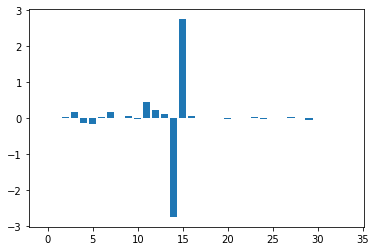

In [24]:
# get feature importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.57      0.65       488
           1       0.92      0.97      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.84      0.77      0.80      3039
weighted avg       0.90      0.90      0.90      3039



#### PCA + SML

In [ ]:
pca = PCA()
pcs = pca.fit_transform(sdata)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



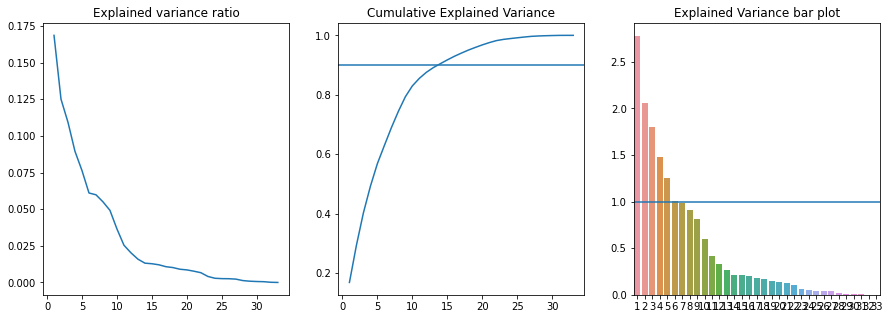

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1, len(varexp)+1), varexp)
plt.title('Explained variance ratio')

plt.subplot(1,3,2)
plt.plot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.9)
plt.title("Cumulative Explained Variance")

plt.subplot(1,3,3)
plt.title('Explained Variance bar plot')
ev = pca.explained_variance_
sns.barplot(list(range(1,len(ev)+1)),
            list(ev))
plt.axhline(1)

plt.show()

In [ ]:
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=COLS, index=sdata.columns)

In [ ]:
compns = pcs[:, :5]
cdf = pd.DataFrame(compns, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5'], index=credit.index)
cdf.head(3)

pc1       pc2       pc3       pc4       pc5
clientnum                                                  
768805383  0.450845 -0.545112 -0.823810  3.743951  3.019978
818770008 -0.523164  1.340119 -0.085098  8.393160  7.370115
713982108 -0.418616  0.949810 -0.622796  7.293252  8.074452

In [ ]:
snew = pd.concat([cdf,scredit['attrition_flag_Existing Customer']], axis=1)
snew.head(3)

pc1       pc2  ...       pc5  attrition_flag_Existing Customer
clientnum                      ...                                            
768805383  0.450845 -0.545112  ...  3.019978                                 1
818770008 -0.523164  1.340119  ...  7.370115                                 1
713982108 -0.418616  0.949810  ...  8.074452                                 1

[3 rows x 6 columns]

In [ ]:
X_features = ['pc1', 'pc2', 'pc3', 'pc4','pc5']
X = snew[X_features]
y = snew['attrition_flag_Existing Customer']

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)

In [ ]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
gbc_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",GradientBoostingClassifier(random_state=42,learning_rate=0.7)) ])
lg_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",LogisticRegression(random_state=42)) ])


f1_cross_val_scores = cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
gbc_f1_cross_val_scores=cross_val_score(gbc_pipe,train_x,train_y,cv=5,scoring='f1')
lg_f1_cross_val_scores=cross_val_score(lg_pipe,train_x,train_y,cv=5,scoring='f1')

In [ ]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores','Adaboost Cross Val Scores','Grandient Boosting Classifier Cross Val Scores','Logistic Regression Cross Val Scores'))
fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(ada_f1_cross_val_scores))),y=ada_f1_cross_val_scores,name='Adaboost'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(gbc_f1_cross_val_scores))),y=gbc_f1_cross_val_scores,name='Grandient Boosting Classifier'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(lg_f1_cross_val_scores))),y=lg_f1_cross_val_scores,name='Logistic Regression'),
    row=4, col=1    
)

fig.update_layout(height=700, width=1000, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

In [ ]:
rf_pipe.fit(train_x,train_y)
rf_prediction = rf_pipe.predict(test_x)

ada_pipe.fit(train_x,train_y)
ada_prediction = ada_pipe.predict(test_x)

gbc_pipe.fit(train_x,train_y)
gbc_prediction = gbc_pipe.predict(test_x)

lg_pipe.fit(train_x,train_y)
lg_prediction = lg_pipe.predict(test_x)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>F1 Score On Test Data<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>AdaBoost<b>','<b>Grandient Boosting Classifier<b>','<b>Logistic Regression<b>'], [np.round(f1(rf_prediction,test_y),2), 
                                                                          np.round(f1(ada_prediction,test_y),2),
                                                                          np.round(f1(gbc_prediction,test_y),2),np.round(f1(lg_prediction,test_y),2)]]))
                     ])

fig.update_layout(title='Model Results On Test Data')
fig.show()

## Card type

In [ ]:
sdata_type = scredit.drop(['card_category_Gold','card_category_Platinum','card_category_Silver'], axis=1)

In [ ]:
# PCA
pca = PCA()
pcs = pca.fit_transform(sdata_type)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



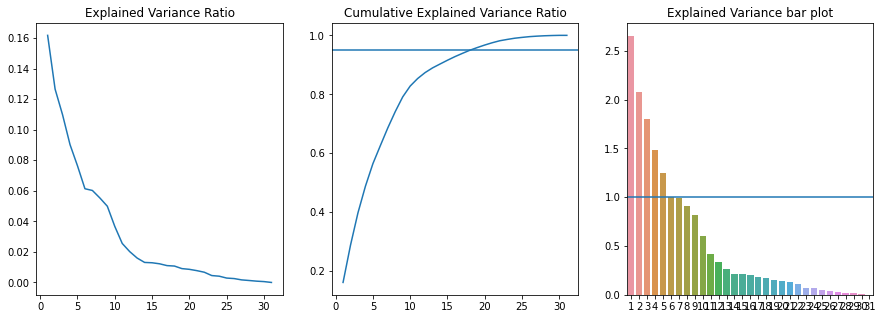

In [ ]:
# check how many pca variables to have
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Explained Variance Ratio')
varexp = pca.explained_variance_ratio_
sns.lineplot(range(1,len(varexp)+1),varexp)

plt.subplot(1,3,2)
plt.title('Cumulative Explained Variance Ratio')
sns.lineplot(range(1,len(varexp)+1),np.cumsum(varexp))
plt.axhline(0.95)


plt.subplot(1,3,3)
plt.title('Explained Variance bar plot')
ev = pca.explained_variance_
sns.barplot(list(range(1,len(ev)+1)),
            list(ev))
plt.axhline(1)

plt.show()

In [ ]:
# get a pc dataframe and choose only the first 5
compns = pcs[:, :5]
cdf = pd.DataFrame(compns, columns=['pc1', 'pc2', 'pc3', 'pc4','pc5'], index=scredit.index)

In [ ]:
# Check ultimate cluster
# use 2 to 30 clusters
KRANGE = range(2,10)

# storage
inertia = []
silo = []

for k in KRANGE:
  km = KMeans(k)
  km.fit(cdf)
  labs = km.predict(cdf)
  inertia.append(km.inertia_)
  silo.append(silhouette_score(cdf, labs))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



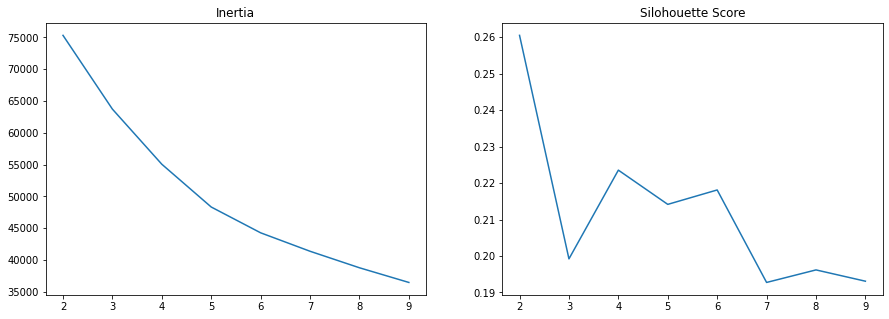

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
plt.title("Inertia")
sns.lineplot(KRANGE, inertia)

plt.subplot(1, 2, 2)
plt.title("Silohouette Score")
sns.lineplot(KRANGE, silo)

plt.show()

In [ ]:
# get the model
k4 = KMeans(4)
k4_labs = k4.fit_predict(cdf)

# metrics
k4_silo = silhouette_score(cdf, k4_labs)
k4_ssamps = silhouette_samples(cdf, k4_labs)
np.unique(k4_labs)

array([0, 1, 2, 3], dtype=int32)

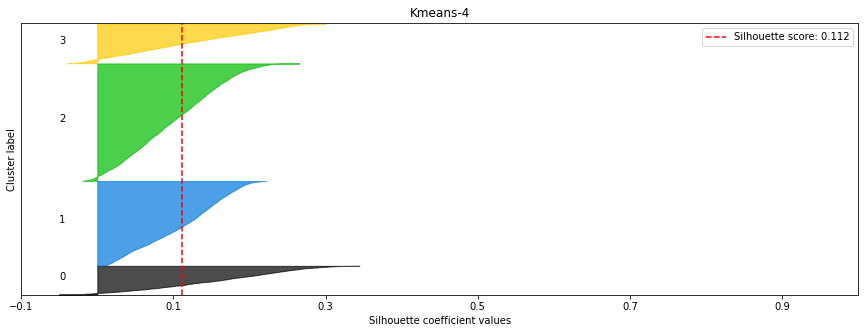

In [ ]:
skplt.metrics.plot_silhouette(scredit, k4_labs, title="Kmeans-4", figsize=(15,5))
plt.show()

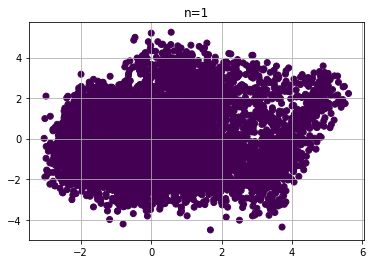

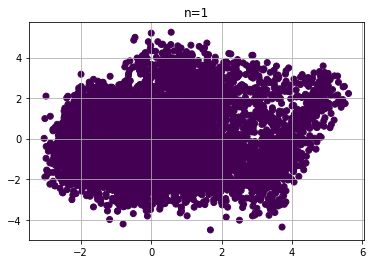

1


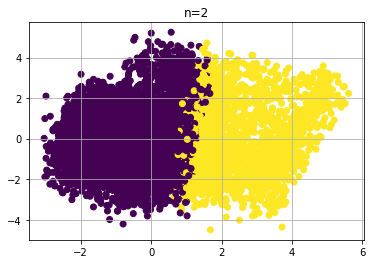

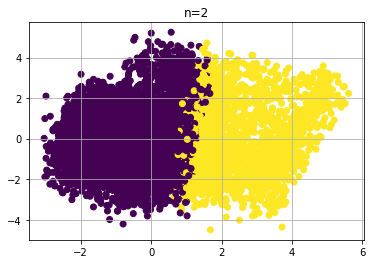

1


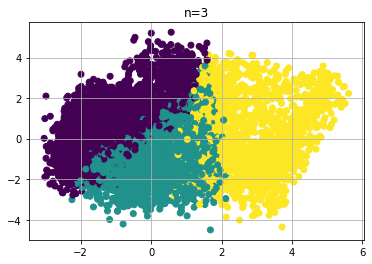

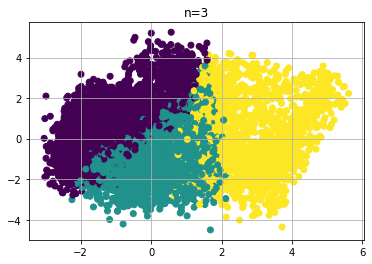

1


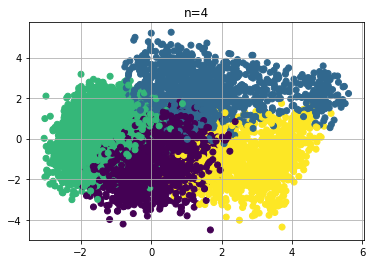

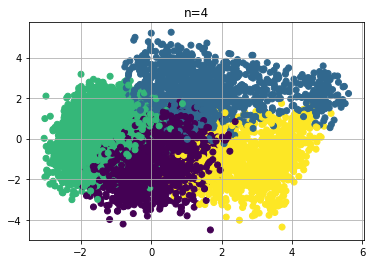

1


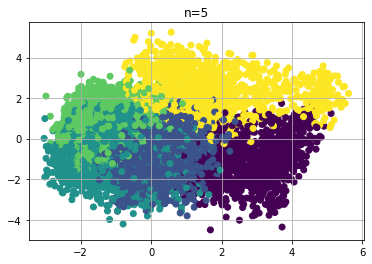

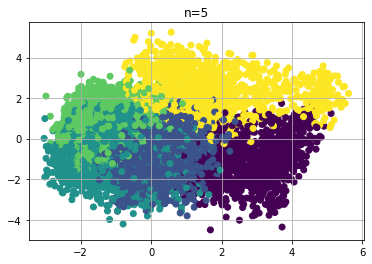

1


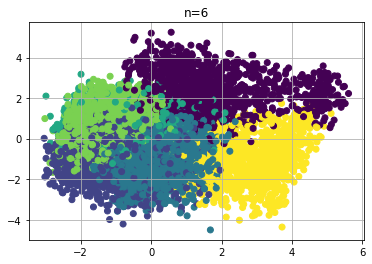

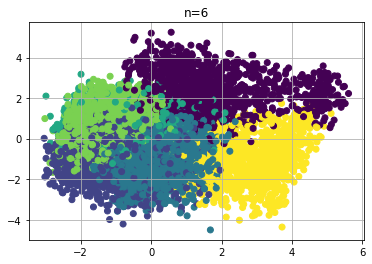

1


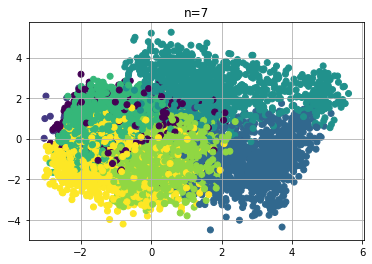

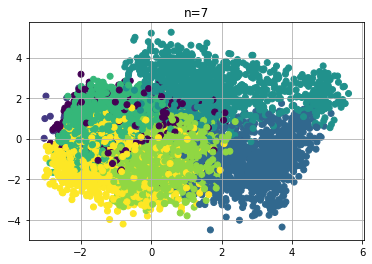

1


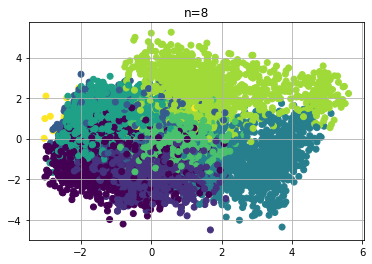

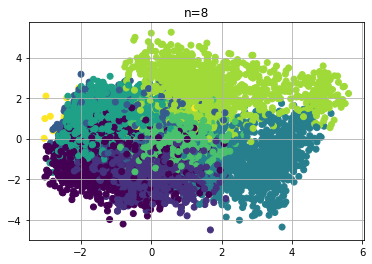

1


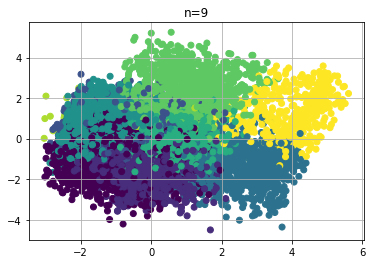

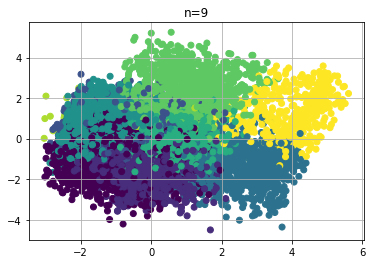

1


In [ ]:
def k_means(n): 
    y_pred = KMeans(n_clusters=n, random_state=9).fit_predict(pcs)
    plt.title('n=%d'%n)
    plt.scatter(pcs[:, 0], pcs[:, 1], c=y_pred)
    plt.grid()
    plt.show()
    return y_pred

for n in range(1, 10):
    if k_means(n).all() == k_means(n).all():
        print(1)

In [ ]:
# profile to sdata_type
sdata_type['k4_labs'] = k4_labs
sdata_type['k4_labs'].value_counts(sort=False)

0    1076
1    3168
2    4398
3    1485
Name: k4_labs, dtype: int64

In [ ]:
profile = sdata_type.groupby('k4_labs').mean().T
profile

k4_labs                                  0         1         2         3
customer_age                     -0.111729  0.036240 -0.005093  0.018728
dependent_count                   0.028253 -0.048550 -0.028465  0.167405
months_on_book                   -0.082855  0.046119 -0.019194  0.018493
total_relationship_count         -1.080645  0.021272  0.199719  0.146140
months_inactive_12_mon           -0.141714  0.140929 -0.051851 -0.044401
contacts_count_12_mon            -0.299874  0.165667 -0.084171  0.113142
credit_limit                      0.527633 -0.324626 -0.519035  1.847407
total_revolving_bal               0.279548 -0.999088  0.628884  0.066319
avg_open_to_buy                   0.502460 -0.234989 -0.575306  1.841074
total_amt_chng_q4_q1              0.053185 -0.220344  0.122436  0.068924
total_trans_amt                   2.407201 -0.328272 -0.262755 -0.265715
total_trans_ct                    1.683771 -0.302758 -0.103951 -0.266279
total_ct_chng_q4_q1               0.064636 -0.280912  0.174703  0.035042
avg_utilization_ratio            -0.356113 -0.776253  0.916973 -0.801685
attrition_flag_Existing Customer  0.979554  0.670770  0.923374  0.848485
gender_M                          0.599442  0.413510  0.343338  0.878114
education_level_Doctorate         0.037175  0.052399  0.041382  0.042424
education_level_Graduate          0.312268  0.310290  0.309914  0.300337
education_level_High School       0.197955  0.193182  0.202819  0.199327
education_level_Post-Graduate     0.048327  0.049558  0.051160  0.055219
education_level_Uneducated        0.157063  0.141414  0.145975  0.153535
education_level_Unknown           0.157063  0.148990  0.149386  0.148822
marital_status_Married            0.438662  0.447285  0.496589  0.413468
marital_status_Single             0.407993  0.409722  0.362892  0.410774
marital_status_Unknown            0.078996  0.071970  0.069577  0.087542
income_category_$40K - $60K       0.184015  0.195707  0.206685  0.042424
income_category_$60K - $80K       0.180297  0.140467  0.107549  0.195286
income_category_$80K - $120K      0.186803  0.111427  0.085493  0.407407
income_category_Less than $40K    0.279740  0.375000  0.469759  0.004040
income_category_Unknown           0.084572  0.134154  0.096862  0.114478
labels                            0.946097  0.981692  0.969532  0.932660

Text(0.5, 1.0, 'Characteristics of 4 customer clusters')

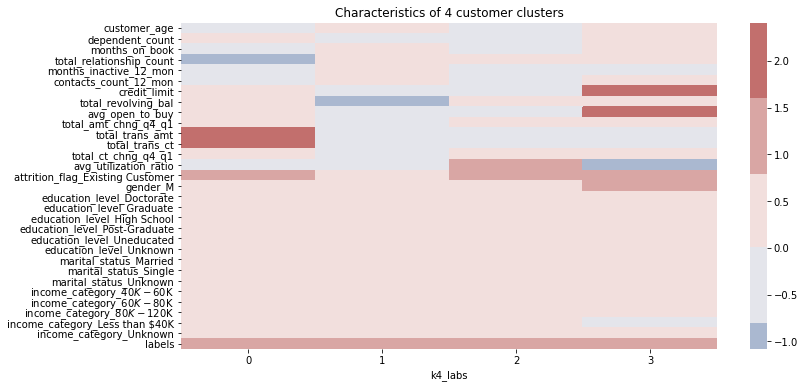

In [ ]:
plt.figure(figsize=(12, 6))
pal = sns.color_palette("vlag")
sns.heatmap(profile, center=0, cmap=pal, xticklabels=profile.columns)
plt.title('Characteristics of 4 customer clusters')

#### Other Methods: UMAP + KMEANS
* does not work well

In [ ]:
u = UMAP(random_state=820, n_neighbors=15, min_dist=0.01)
u.fit(scredit)
ue = u.transform(scredit)

In [ ]:
ue.shape

(10127, 2)

In [ ]:
umap_df = pd.DataFrame(ue, columns=['x','y'], index=scredit.index)
umap_df['attrition'] = credit['attrition_flag']

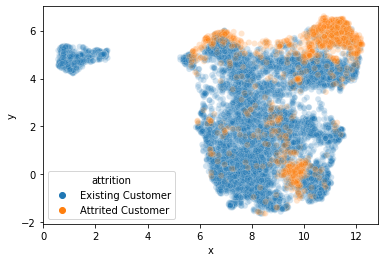

In [ ]:
sns.scatterplot(x="x", y="y", hue="attrition", data=umap_df, alpha=0.2)

In [ ]:
umap_df = umap_df.drop('attrition',axis=1)

In [ ]:
# get the model
k4 = KMeans(4)
k4_labs = k4.fit_predict(umap_df)

# metrics
k4_silo = silhouette_score(umap_df, k4_labs)
k4_ssamps = silhouette_samples(umap_df, k4_labs)
np.unique(k4_labs)

array([0, 1, 2, 3], dtype=int32)

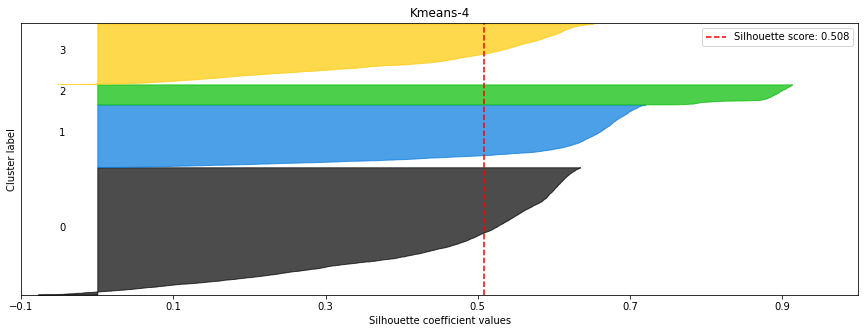

In [ ]:
skplt.metrics.plot_silhouette(umap_df, k4_labs, title="Kmeans-4", figsize=(15,5))
plt.show()

In [ ]:
sdata_type['k4_umap'] = k4_labs
sdata_type['k4_umap'].value_counts(sort=False)

0    4770
1    2338
2     749
3    2270
Name: k4_umap, dtype: int64

In [ ]:
profile = sdata_type.groupby('k4_umap').mean().T

Text(0.5, 1.0, 'Characteristics of 4 customer clusters')

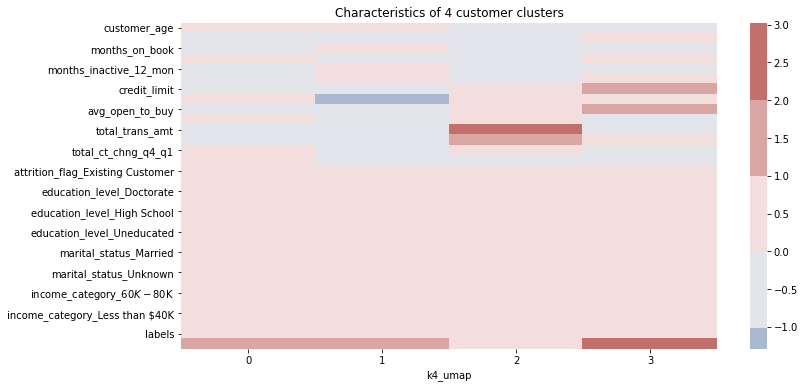

In [ ]:
plt.figure(figsize=(12, 6))
pal = sns.color_palette("vlag")
sns.heatmap(profile, center=0, cmap=pal, xticklabels=profile.columns)
plt.title('Characteristics of 4 customer clusters')